Model taken from 

    Smith, Amber M., and Amanda P. Smith. "A critical, nonlinear threshold dictates bacterial invasion and initial kinetics during influenza." Scientific reports 6.1 (2016): 38703.

In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import model_coinfection
from stochastic_tests import Test

t_fin = 18.0
num_steps = 100

test = Test(model=model_coinfection({'beta': ('norm', (2.8E-6, 0.28E-6 * 2))}),
            t_fin=t_fin,
            num_steps=num_steps,
            sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
            trials=[10, 100, 1000, 10000],
            stochastic=False)

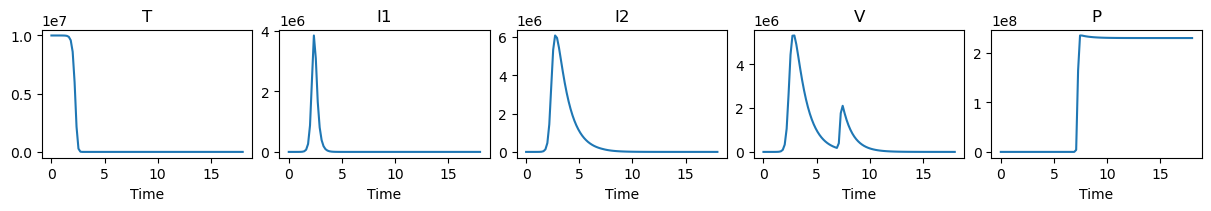

In [2]:
test.execute_deterministic()
_ = test.plot_results_deterministic()

In [3]:
label, out = ipw.Label(), ipw.Output()
display(out)
with out:
    display(label)

start_pool()
test.execute_stochastic(label)
_ = out.clear_output()

Output()

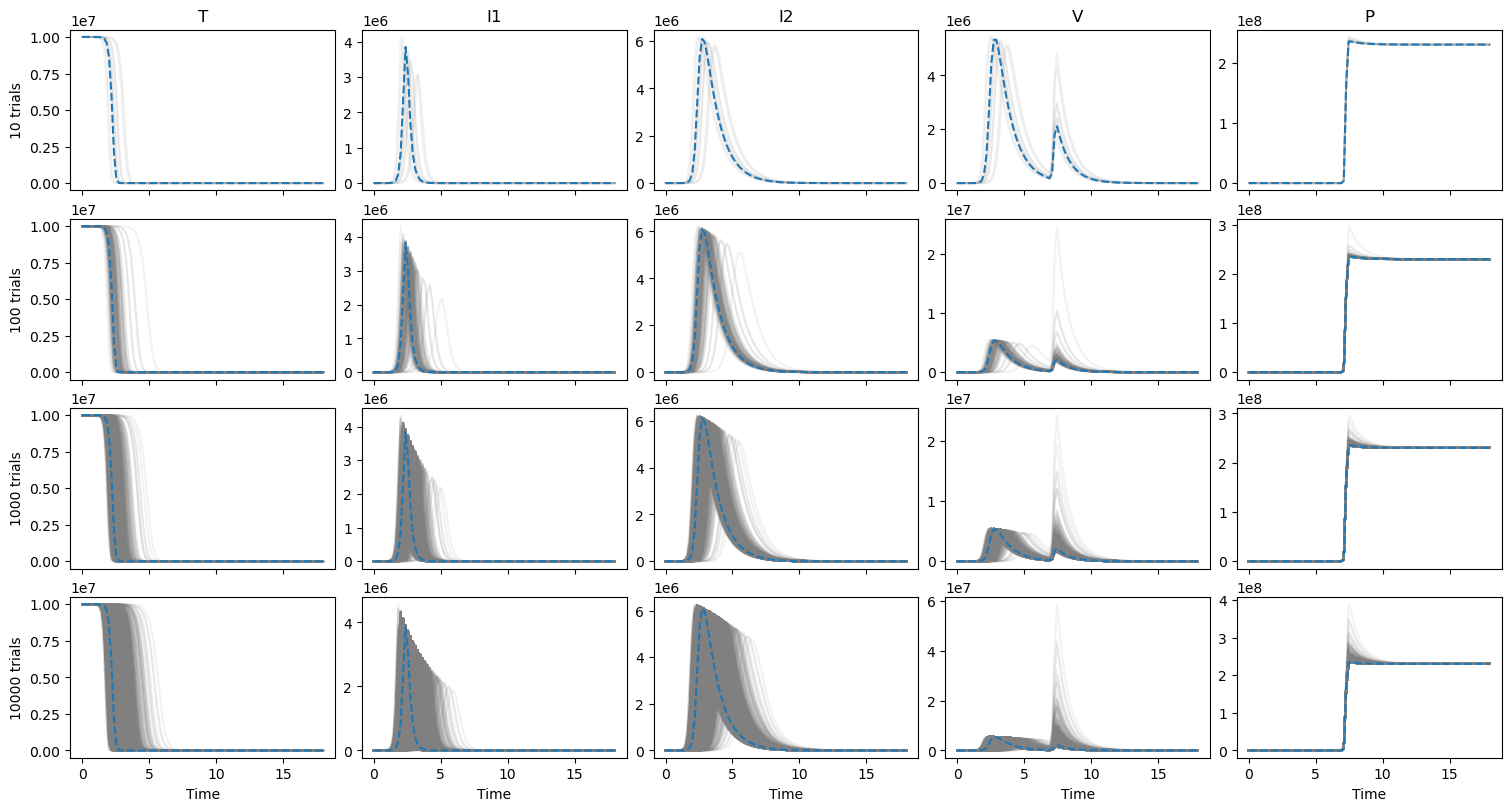

In [4]:
_ = test.plot_results_stochastic()

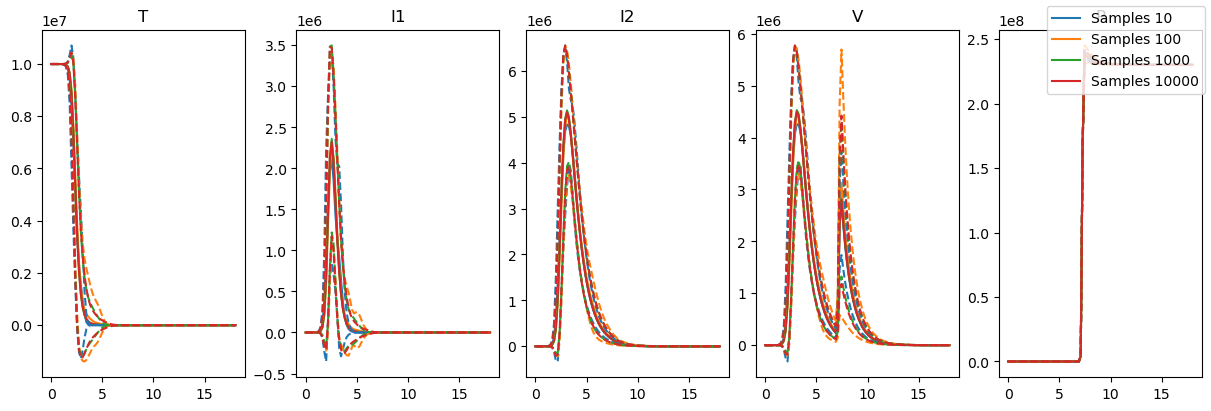

In [5]:
_ = test.plot_stats()

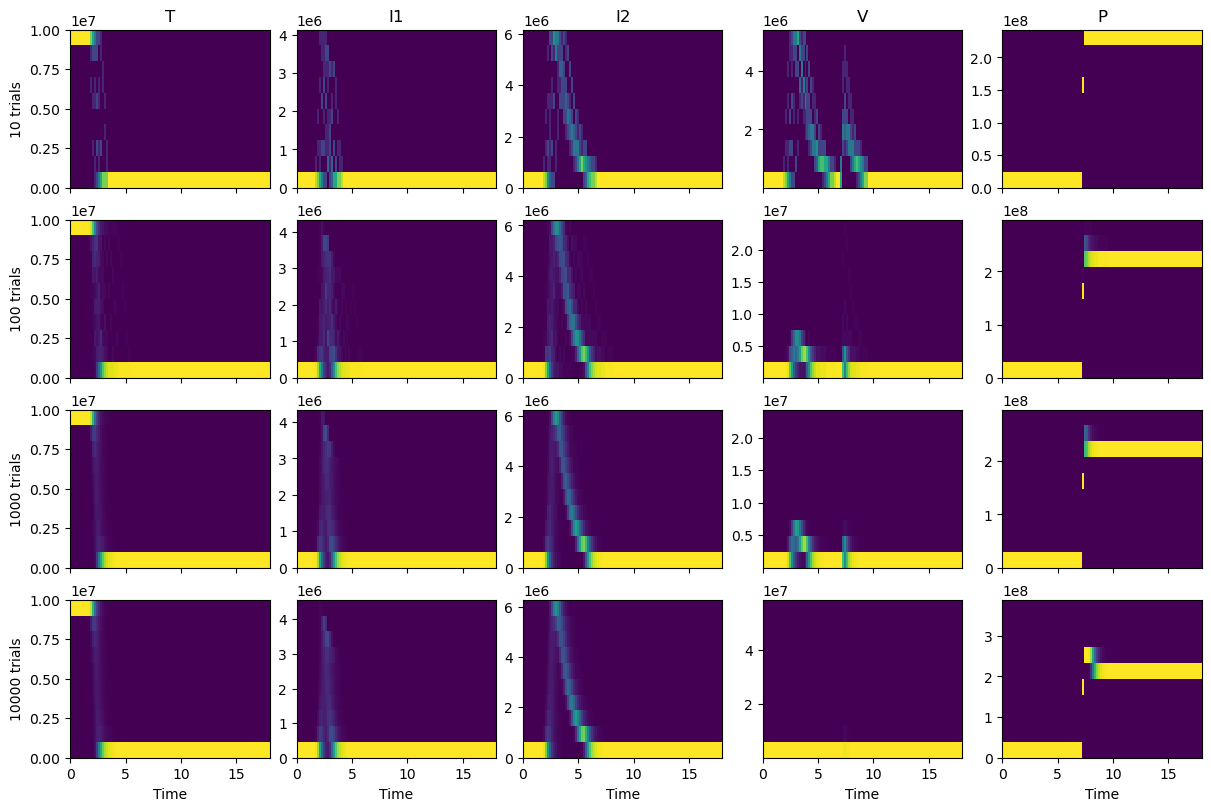

In [6]:
_ = test.plot_distributions()

In [7]:
# progress_bar, out = ipw.IntProgress(), ipw.Output()
# progress_bar.max = (len(test.trials) - 1) * len(test.model.results_names)
# display(out)

# with out:
#     label = ipw.Label(value='Calculating differences...')
#     vbox = ipw.VBox([label, progress_bar])
#     display(vbox)

# test.measure_dist_diff_basic(progress_bar=progress_bar)
# out.clear_output()

# _ = test.plot_dist_diff(test.acc_diff_basic[0.0])

In [8]:
# progress_bar, out = ipw.IntProgress(), ipw.Output()
# progress_bar.max = len(test.trials) * len(test.model.results_names)
# display(out)

# with out:
#     label = ipw.Label(value='Calculating differences...')
#     vbox = ipw.VBox([label, progress_bar])
#     display(vbox)

# test.measure_dist_diff_basic(filter=0.05, progress_bar=progress_bar)
# out.clear_output()

# _ = test.plot_dist_diff(test.acc_diff_basic[0.05])

In [9]:
# progress_bar, out = ipw.IntProgress(), ipw.Output()
# progress_bar.max = (len(test.trials) - 1) * len(test.model.results_names)
# display(out)

# with out:
#     label = ipw.Label(value='Calculating differences...')
#     vbox = ipw.VBox([label, progress_bar])
#     display(vbox)

# test.measure_dist_div_kldiv(progress_bar=progress_bar)
# out.clear_output()

# _ = test.plot_dist_diff(test.acc_diff_kl_div)

In [10]:
# out = ipw.Output()
# display(out)

# with out:
#     print('Analyzing correlations...')
# test.measure_correlation()
# out.clear_output()

# _ = test.plot_correlations()

In [11]:
test.find_ecfs()
test.measure_ecf_diffs()

In [12]:
for t in test.trials:
    ecf_ks_stat_t = {n: -1 for n in test.model.results_names}
    for ks in test.ecf_ks_stat[t]:
        for n, ks_stat in ks.items():
            ecf_ks_stat_t[n] = max(ecf_ks_stat_t[n], ks_stat)
    print(f'{t} trials')
    for n, ks_stat in ecf_ks_stat_t.items():
        print(f'\t{n}: {ks_stat}')

10 trials
	T: 1.4299596491954016
	I1: 1.4446902429811457
	I2: 1.4746480126628903
	V: 1.437374561950195
	P: 1.2516323435814134
100 trials
	T: 0.4932166458917071
	I1: 0.5189203521022606
	I2: 0.4699523040812259
	V: 0.4789676739719213
	P: 0.41352557950493146
1000 trials
	T: 0.17266394489467657
	I1: 0.15418662396104563
	I2: 0.15918343269171367
	V: 0.14741641007094325
	P: 0.1206509651474532
10000 trials
	T: 0.046304454816848556
	I1: 0.04562649652323301
	I2: 0.04933990806837324
	V: 0.04552390288558534
	P: 0.030609325288667447


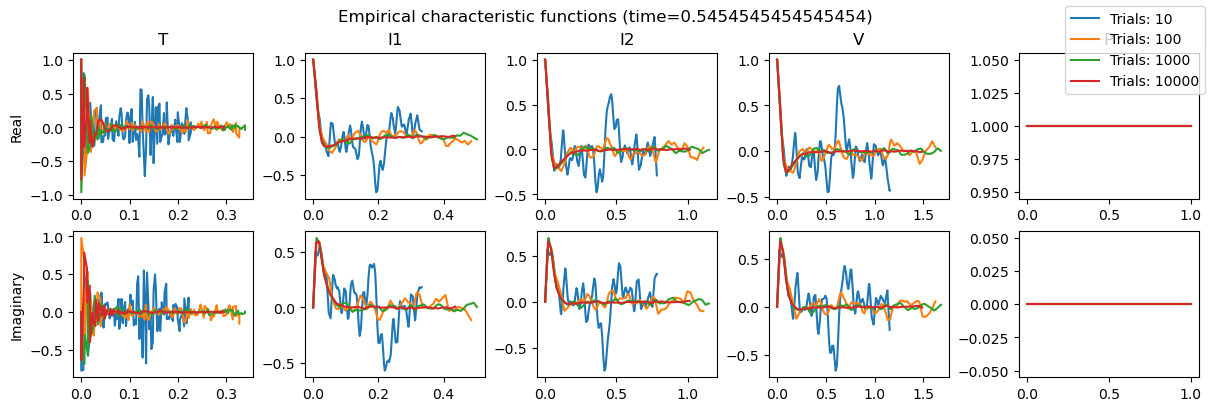

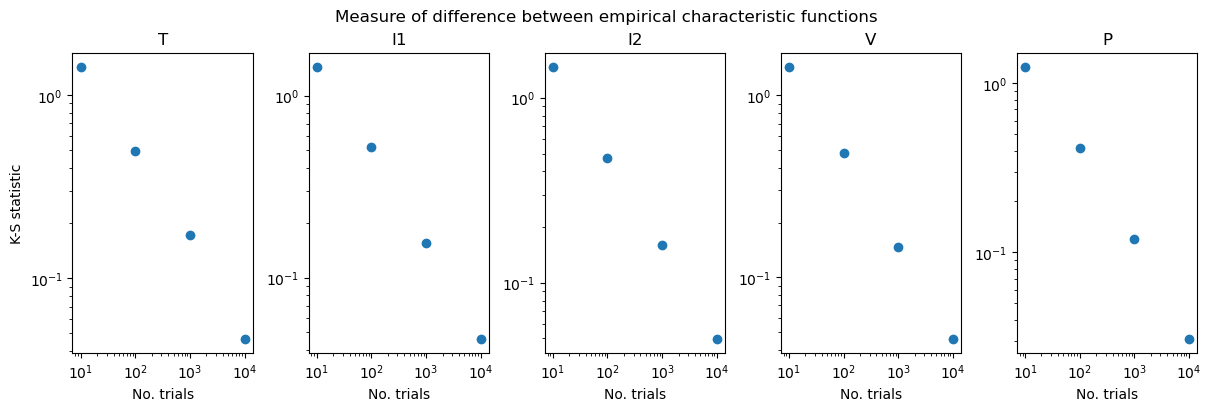

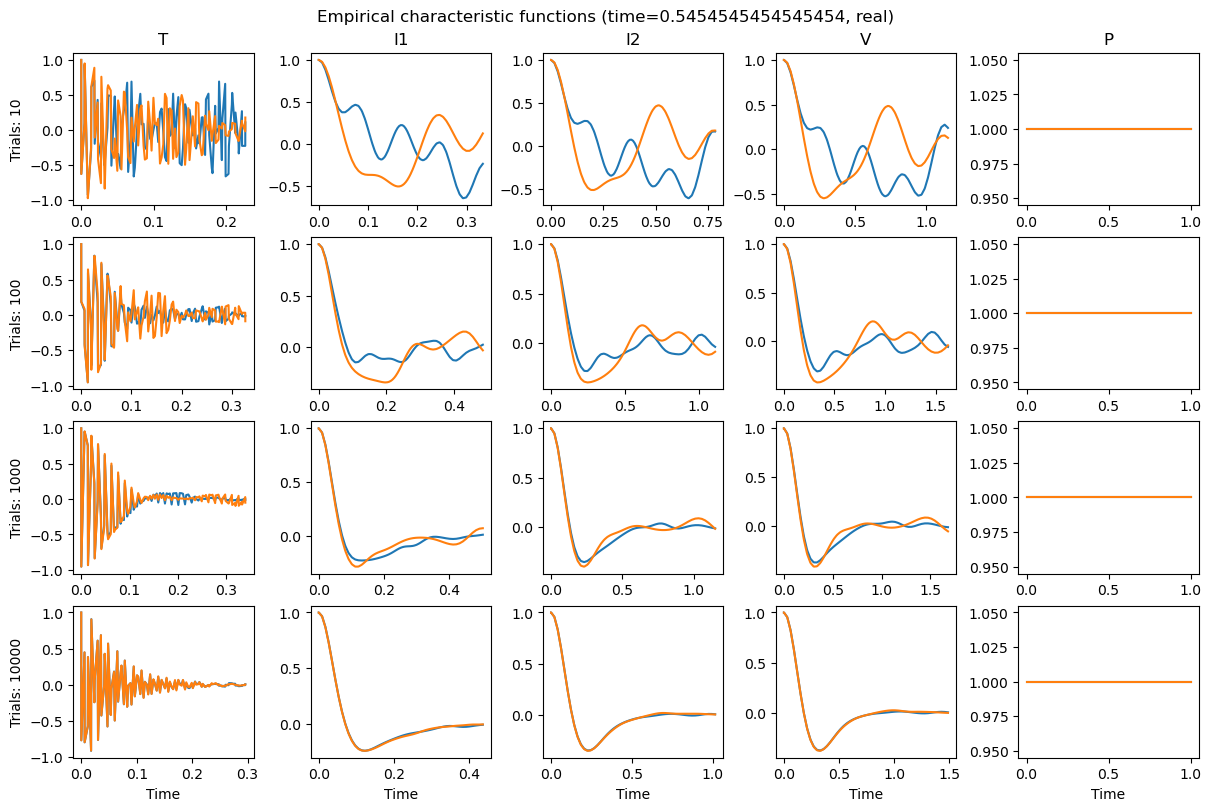

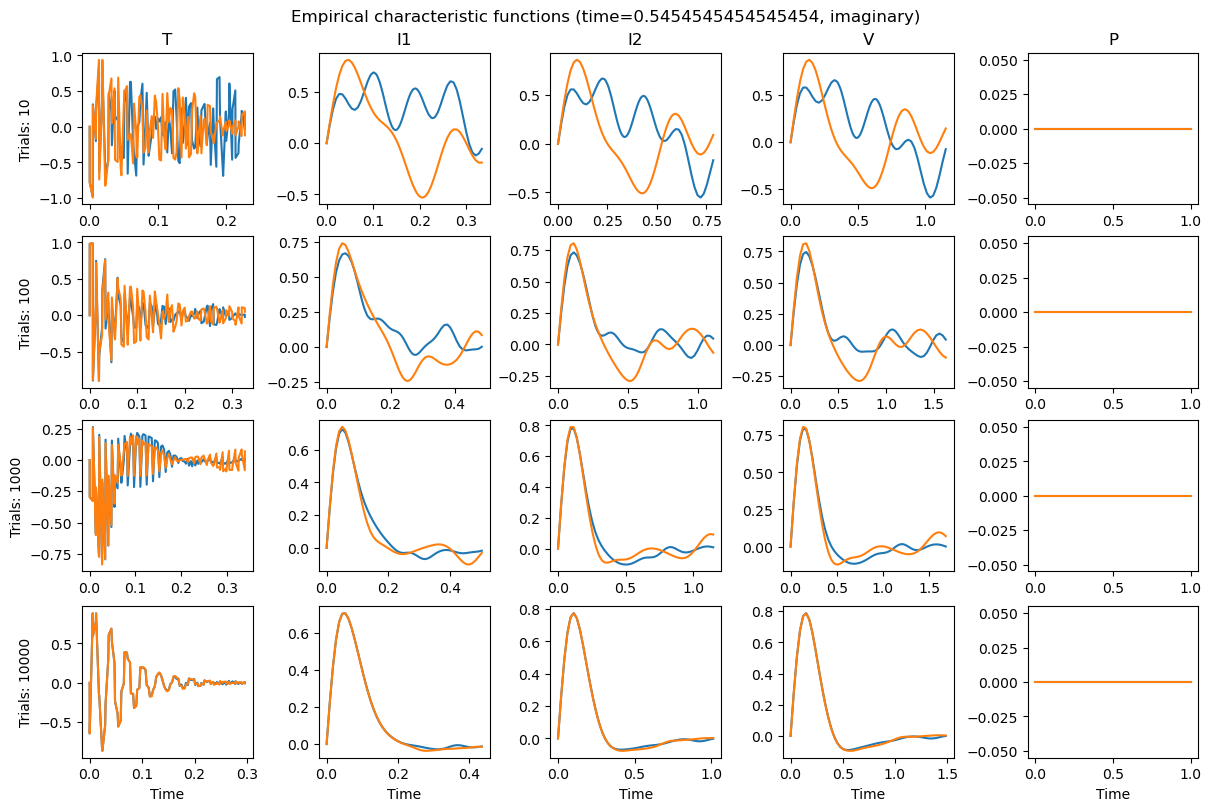

In [13]:
preview_time = test.max_ks_stat_time(test.trials[-1])
# preview_time = test.min_final_eval_time(test.trials[-1])

test.plot_ecf(time=preview_time)
test.plot_ecf_diffs()
_ = test.plot_ecf_comparison(time=preview_time)

In [14]:
test.generate_ecf_diff_fits()

/Users/timothy.sego/Desktop/Current/stochastic_repro/stochastic_repro.py:992: OptimizeWarning: Covariance of the parameters could not be estimated
  return curve_fit(fit_func, data_x, data_y, **kwargs)


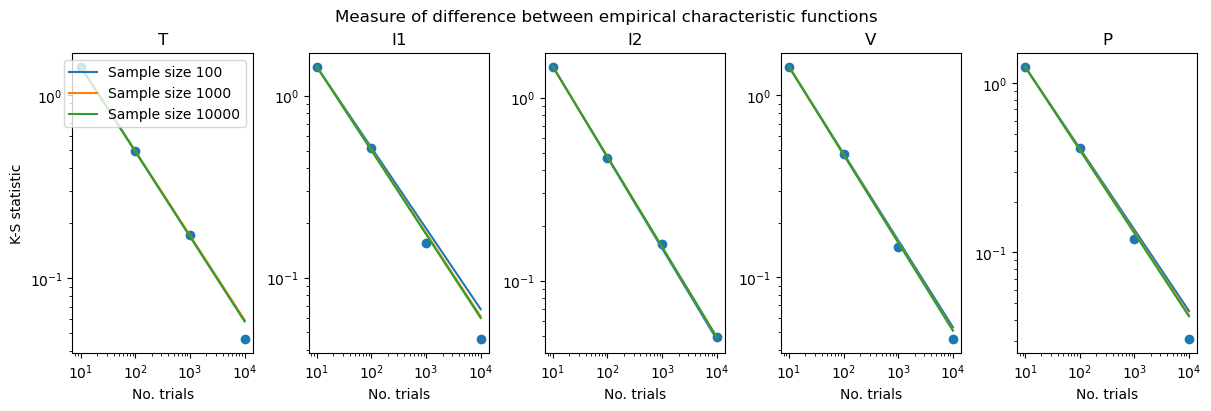

In [15]:
_, axs = test.plot_ecf_diff_fits(test.plot_ecf_diffs())
_ = axs[0].legend()

In [16]:
# Runtime: ~12 minutes (M1 max)
test.test_sampling(err_thresh=1E-3)

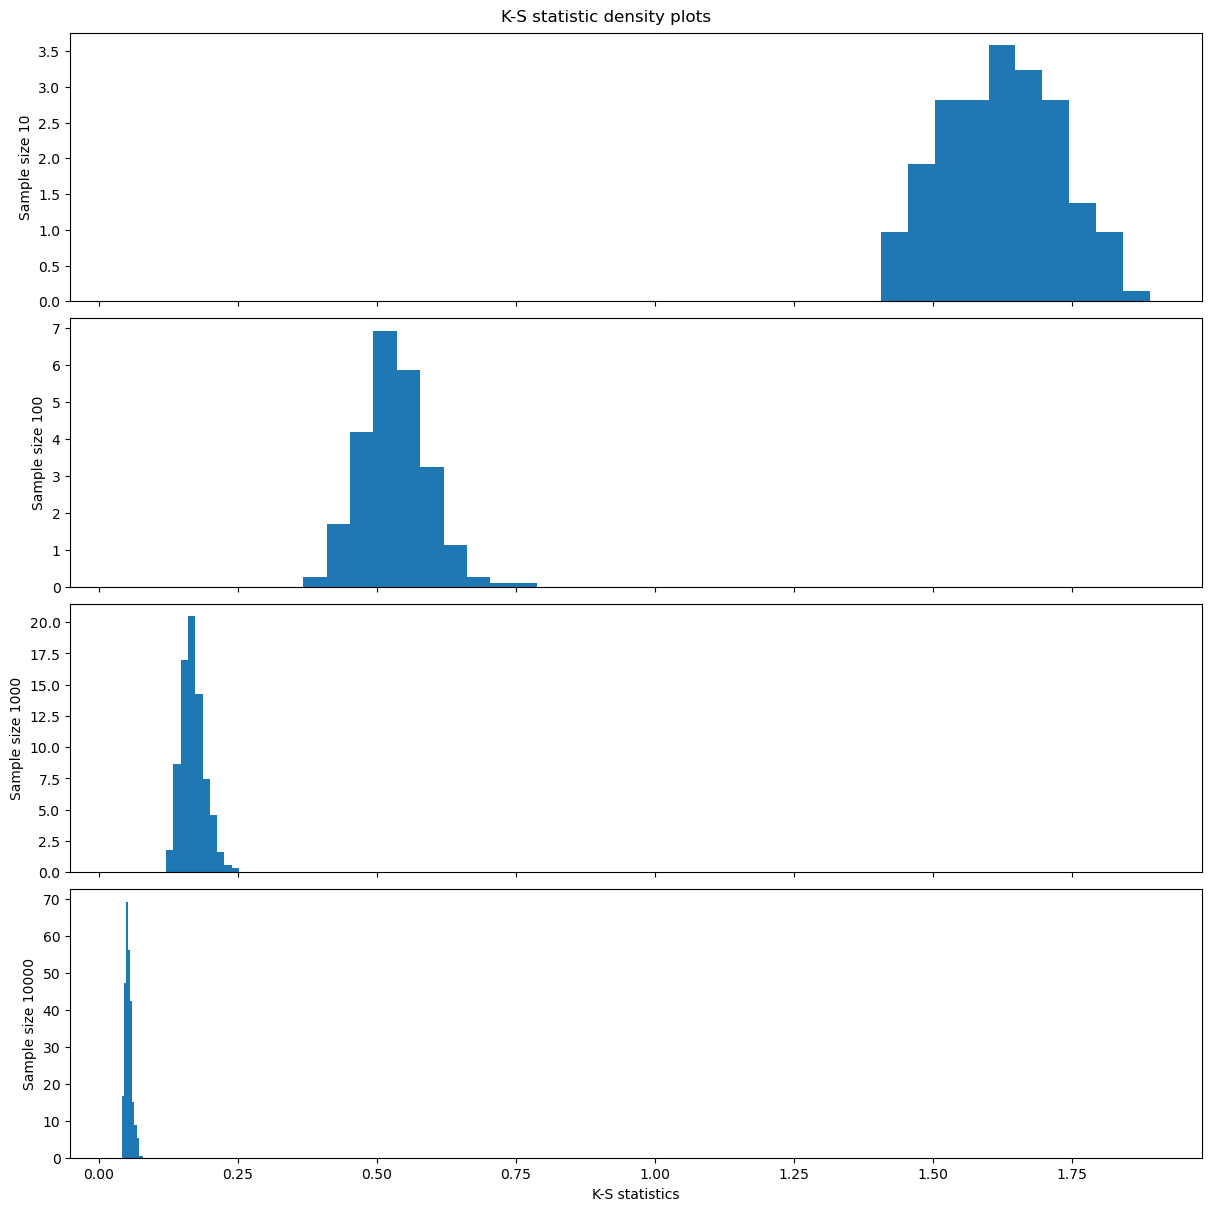

In [17]:
_ = test.plot_ks_sampling()

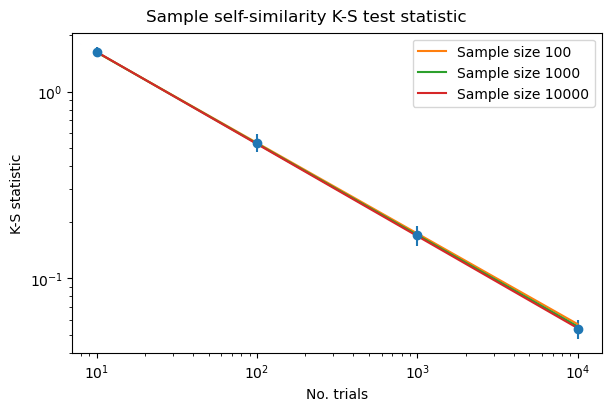

In [18]:
test.generate_ecf_sampling_fits()
_, ax = test.plot_ecf_sampling_fits(test.plot_ecf_sampling())
_ = ax.legend()